# Modules

In [58]:
import spectral_analysis as sa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import importlib
import sys
module = sys.modules["spectral_analysis"]
importlib.reload(module)

<module 'spectral_analysis' from 'd:\\Users\\rewas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\spectral_analysis.py'>

# Testing complex plotting

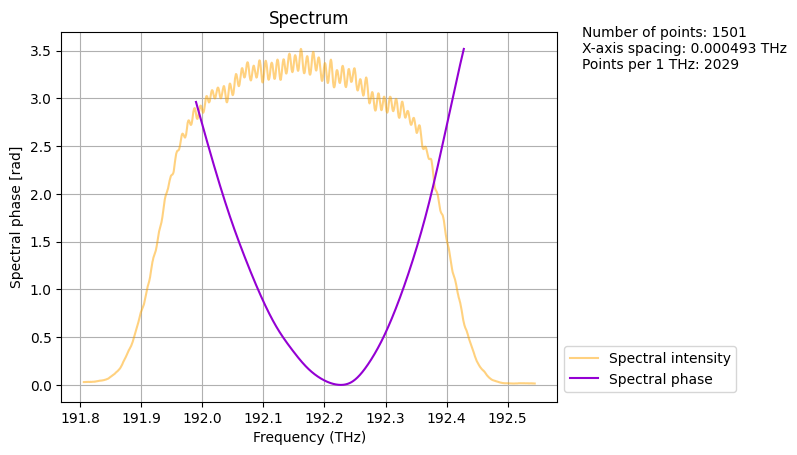

In [60]:
shear = sa.find_shear("data3/80del40chirp_sheared.csv", 
            "data3/80del40chirp_not_sheared.csv", 
            smoothing_period = 1/75,
            how = "fit", 
            plot = False)

phase = sa.spider("data3/80del40chirp_p_spectrum.csv", 
          "data3/80del40chirp_t_spectrum.csv",
          shear = shear,
          what_to_return = "phase",
          plot_pulse = False,
          plot_phase = False,
          smoothing_period = 0.065)[1]

phase.Y = np.abs(phase.Y)

intensity = sa.load_csv("data3/80del40chirp_not_sheared.csv")
intensity.wl_to_freq()

analytic = sa.create_complex_spectrum(intensity, phase, extrapolate = False)
sa.plot(analytic, what_to_plot = "trigonometric")

# 0 m chirping fiber

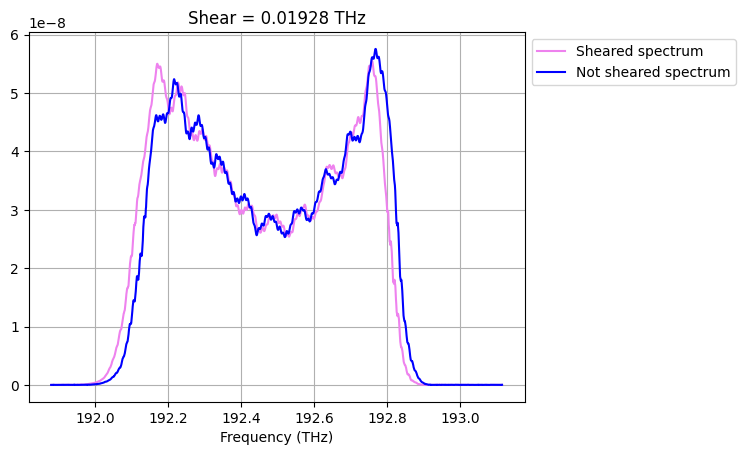

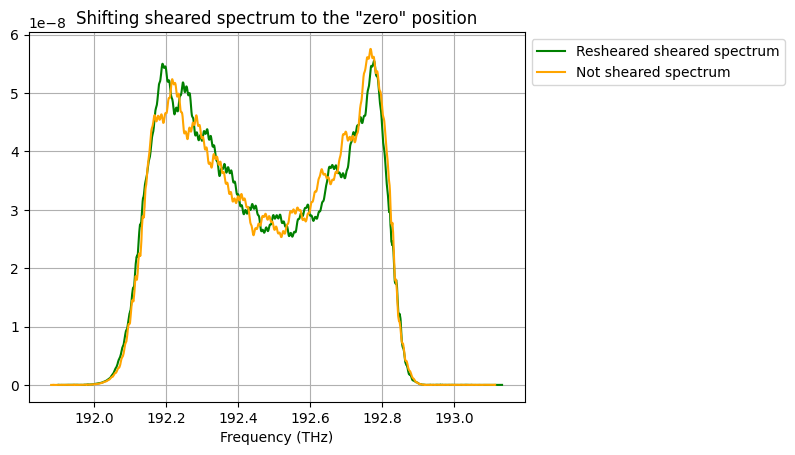

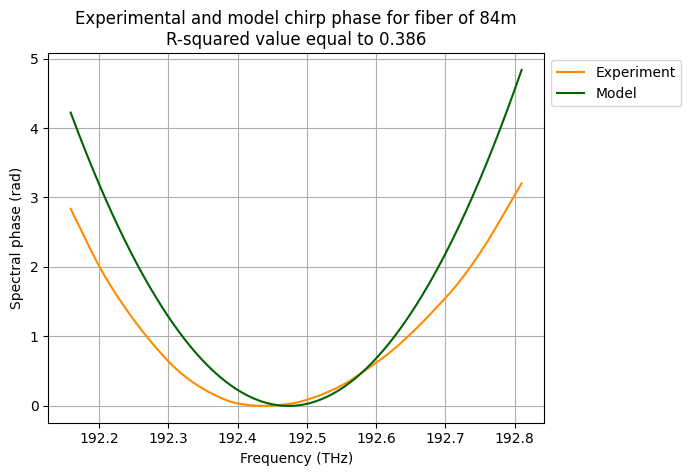

0.38601561491752234

In [32]:
shear = sa.find_shear("data/0m_shear.csv", 
            "data/0m_noshear.csv", 
            smoothing_period = 1/75,
            how = "fit", 
            plot = True)

phase_0 = sa.spider("data/0m_pspectrum.csv", 
          "data/0m_tspectrum.csv",
          shear = shear,
          what_to_return = "phase",
          plot_pulse = False,
          plot_phase = False,
          smoothing_period = 0.065)[1]

sa.chirp_r2(phase_0, 84, True)

# 20 m chirping fiber

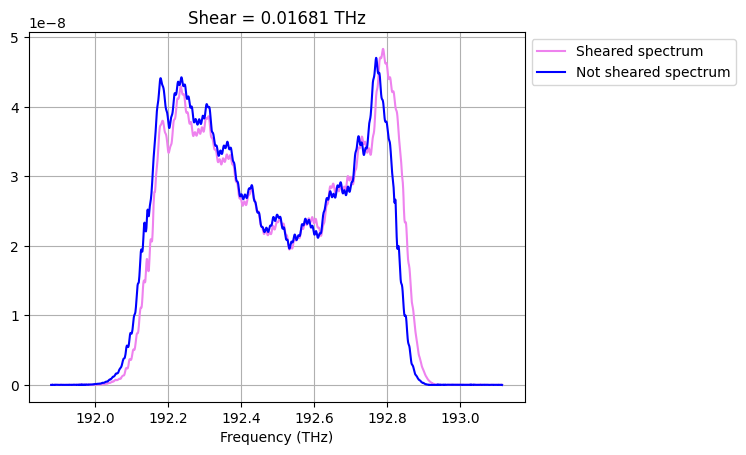

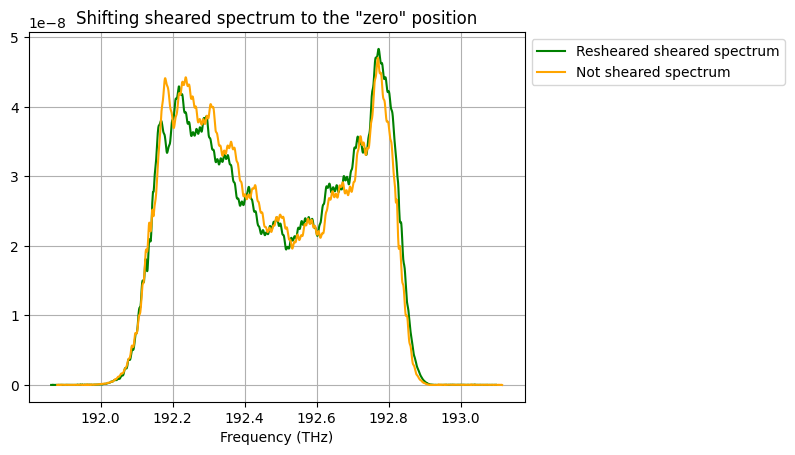

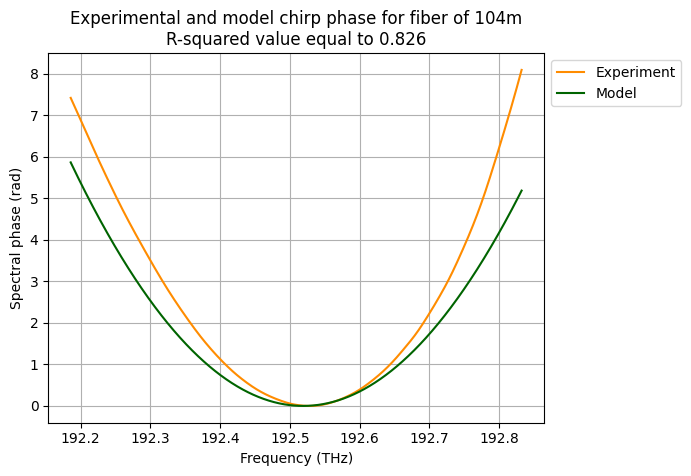

0.8255474162191088

In [33]:
shear = sa.find_shear("data/20m_shear.csv", 
            "data/20m_noshear.csv", 
            smoothing_period = 1/75,
            how = "fit", 
            plot = True)

phase_20 = sa.spider("data/20m_pspectrum.csv", 
          "data/20m_tspectrum.csv",
          shear = shear,
          what_to_return = "phase",
          plot_pulse = False,
          plot_phase = False,
          smoothing_period = 0.065)[1]

sa.chirp_r2(phase_20, 104, True)

# 40 m fiber length

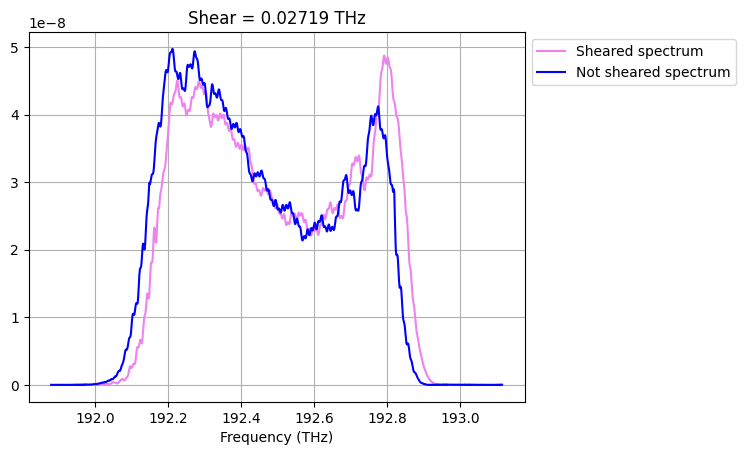

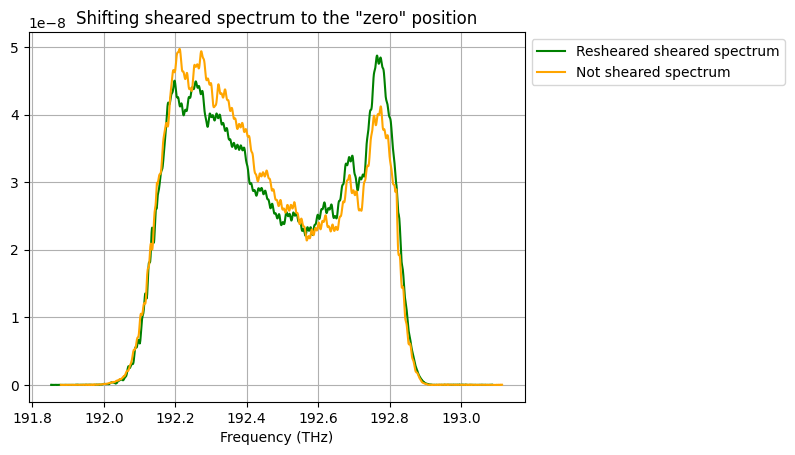

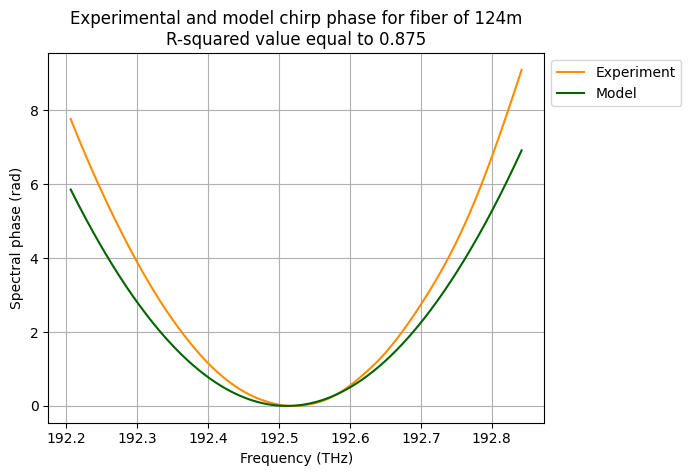

0.874570518870593

In [34]:
shear = sa.find_shear("data/40m_shear.csv", 
            "data/40m_noshear.csv", 
            smoothing_period = 1/75,
            how = "fit", 
            plot = True)

phase_40 = sa.spider("data/40m_pspectrum.csv", 
          "data/40m_tspectrum.csv",
          shear = shear,
          what_to_return = "phase",
          plot_pulse = False,
          plot_phase = False,
          smoothing_period = 0.065)[1]

sa.chirp_r2(phase_40, 124, True)

# 60 m fiber length

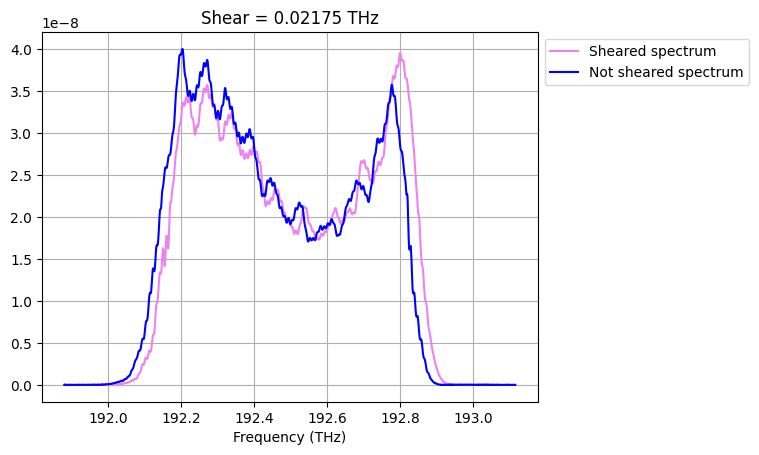

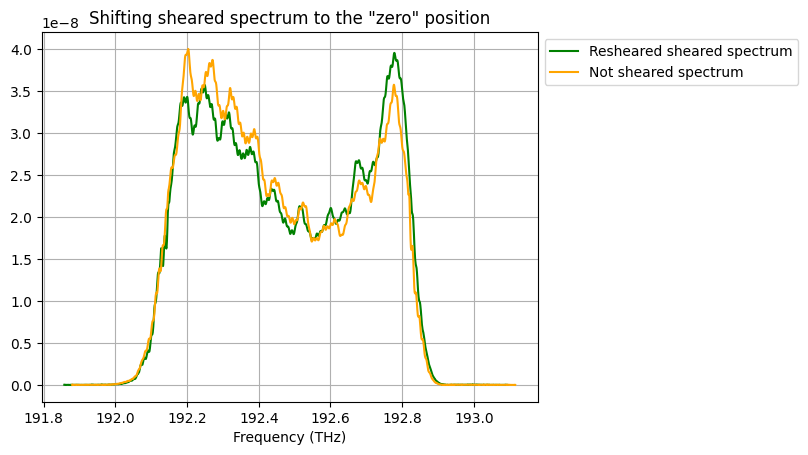

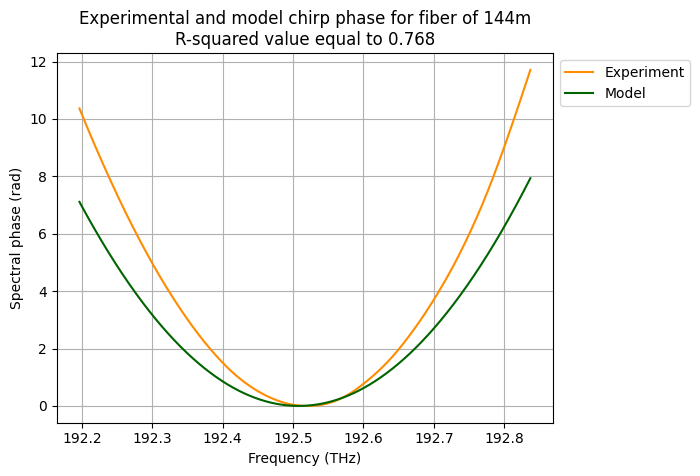

0.7682294926271668

In [35]:
shear = sa.find_shear("data/60m_shear.csv", 
            "data/60m_noshear.csv", 
            smoothing_period = 1/75,
            how = "fit", 
            plot = True)

phase_60 = sa.spider("data/60m_pspectrum.csv", 
          "data/60m_tspectrum.csv",
          shear = shear,
          what_to_return = "phase",
          plot_pulse = False,
          plot_phase = False,
          smoothing_period = 0.065)[1]

sa.chirp_r2(phase_60, 144, True)

# 25 September, 40+80m

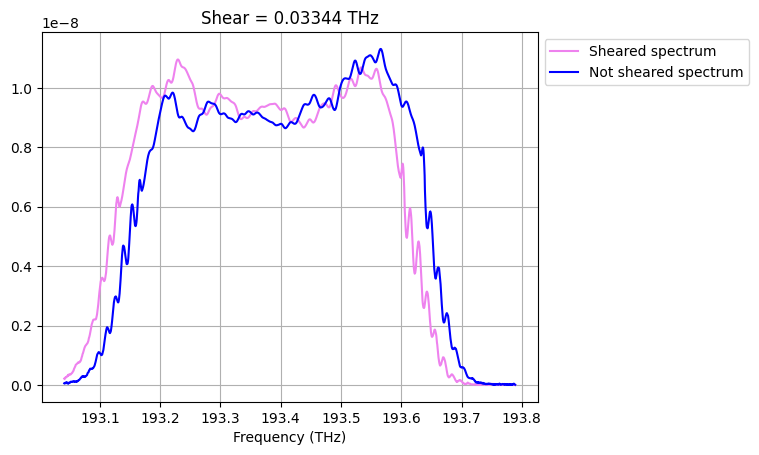

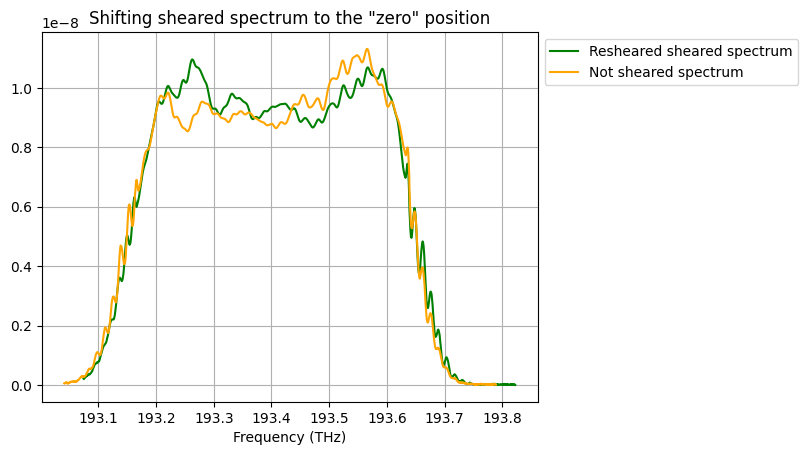

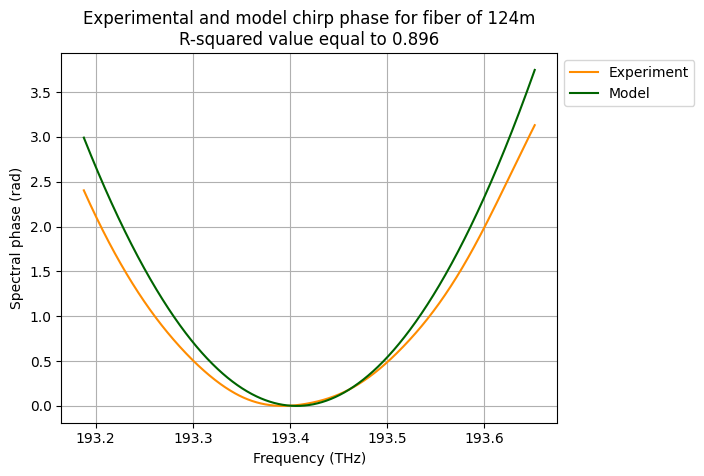

0.8963498723629965

In [36]:
shear = sa.find_shear("data2/80d40c_shear.csv", 
            "data2/80d40c_noshear.csv", 
            smoothing_period = 1/75,
            how = "fit", 
            plot = True)

phase_40_v2 = sa.spider("data2/80d40c_pspectrum.csv", 
          "data2/80d40c_tspectrum.csv",
          shear = shear,
          what_to_return = "phase",
          plot_pulse = False,
          plot_phase = False,
          smoothing_period = 0.065)[1]

sa.chirp_r2(phase_40_v2, 124, True)

# 12 August, 80+20m

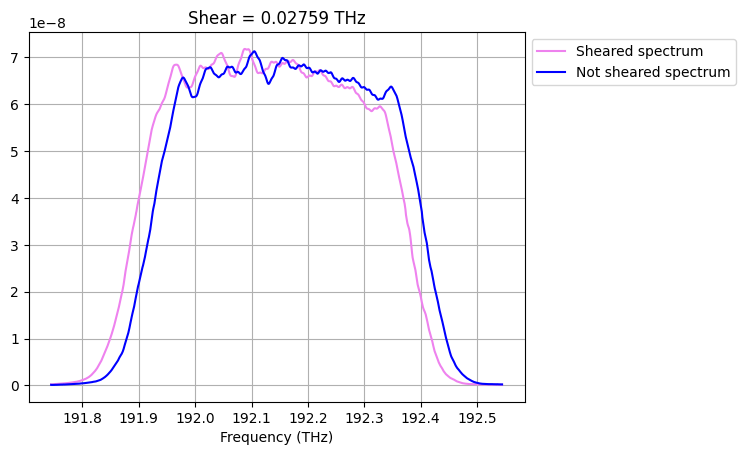

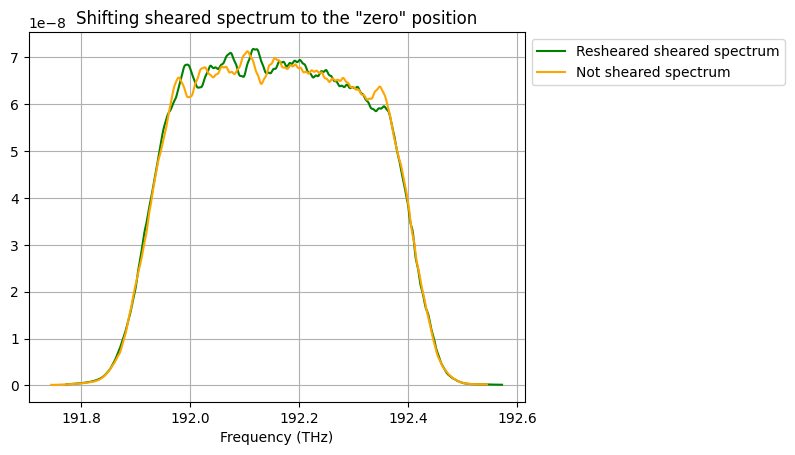

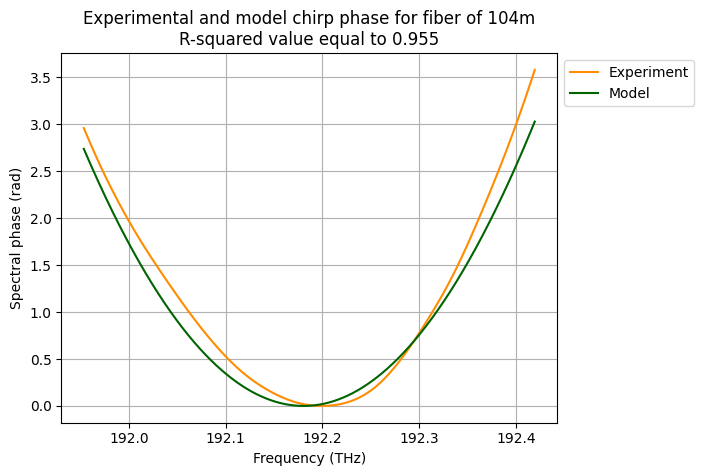

0.9546649951542432

In [37]:
shear = sa.find_shear("data3/80del20chirp_sheared.csv", 
            "data3/80del20chirp_not_sheared.csv", 
            smoothing_period = 1/75,
            how = "fit", 
            plot = True)

phase_20_v3 = sa.spider("data3/80del20chirp_p_spectrum.csv", 
          "data3/80del20chirp_t_spectrum.csv",
          shear = shear,
          what_to_return = "phase",
          plot_pulse = False,
          plot_phase = False,
          smoothing_period = 0.065)[1]

sa.chirp_r2(phase_20_v3, 104, True)

# 12 August, 80+40m

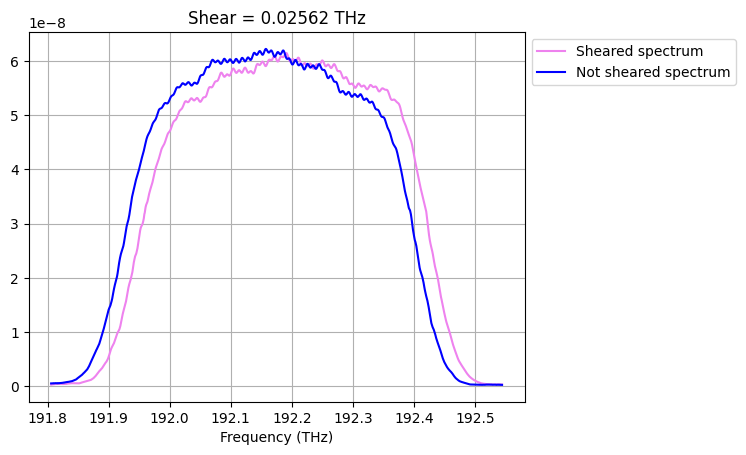

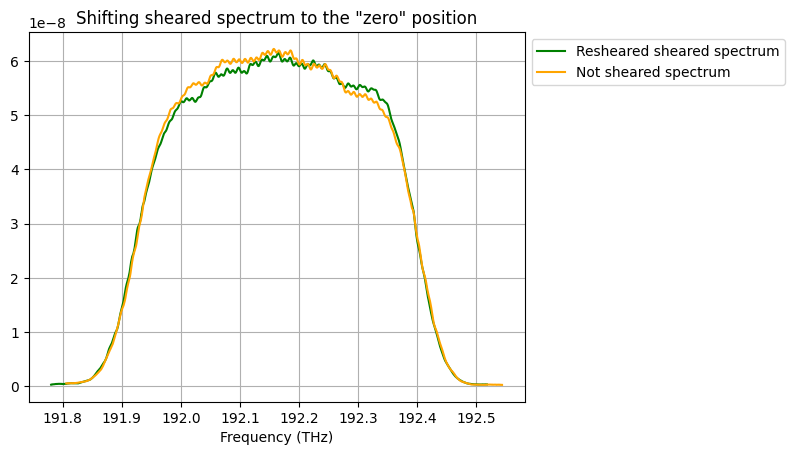

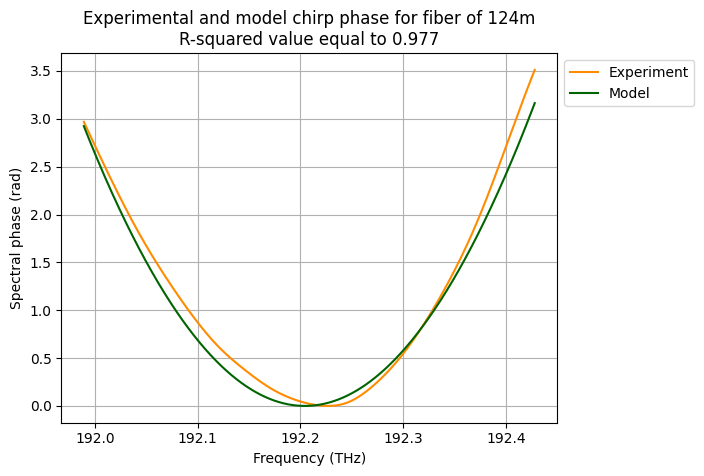

0.9767466350782813

In [38]:
shear = sa.find_shear("data3/80del40chirp_sheared.csv", 
            "data3/80del40chirp_not_sheared.csv", 
            smoothing_period = 1/75,
            how = "fit", 
            plot = True)

phase_40_v3 = sa.spider("data3/80del40chirp_p_spectrum.csv", 
          "data3/80del40chirp_t_spectrum.csv",
          shear = shear,
          what_to_return = "phase",
          plot_pulse = False,
          plot_phase = False,
          smoothing_period = 0.065)[1]

sa.chirp_r2(phase_40_v3, 124, True)

# And we compare everything

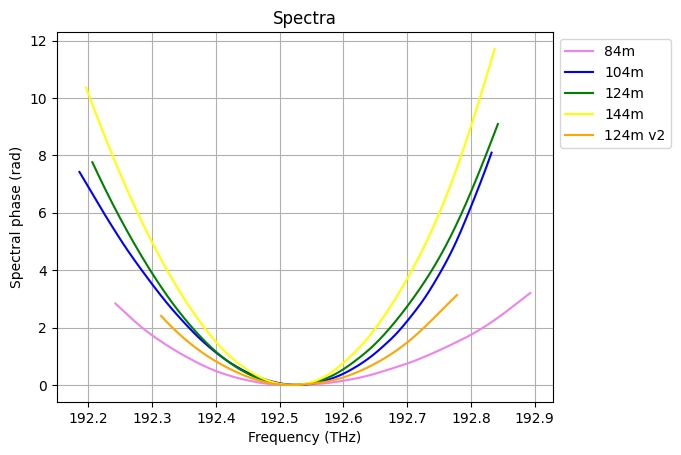

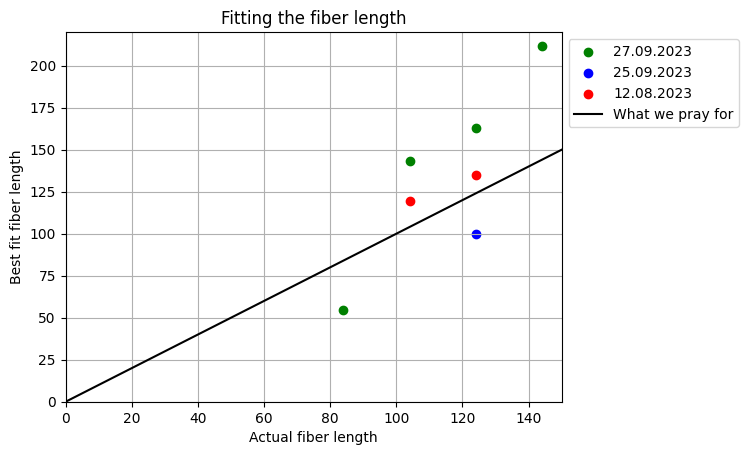

In [39]:
phase_20.Y = np.abs(phase_20.Y)
phase_40.Y = np.abs(phase_40.Y)
phase_60.Y = np.abs(phase_60.Y)
phase_40_v2.Y = np.abs(phase_40_v2.Y)
phase_20_v3.Y = np.abs(phase_20_v3.Y)
phase_40_v3.Y = np.abs(phase_40_v3.Y)

if np.searchsorted(phase_40_v2.X, np.argmin(phase_40_v2.Y)) != np.searchsorted(phase_40.X, np.argmin(phase_40.Y)):
    phase_40_v2.shift(phase_40.X[np.argmin(phase_40.Y)] - phase_40_v2.X[np.argmin(phase_40_v2.Y)])

if np.searchsorted(phase_0.X, np.argmin(phase_40.Y)) != np.searchsorted(phase_40.X, np.argmin(phase_40.Y)):
    phase_0.shift(phase_40.X[np.argmin(phase_40.Y)] - phase_0.X[np.argmin(phase_0.Y)])

sa.compare_plots([phase_0, phase_20, phase_40, phase_60, phase_40_v2],
                 legend = ["84m", "104m", "124m", "144m", "124m v2" ])

fiber_0 = sa.fit_fiber_length(phase_0, False)
fiber_20 = sa.fit_fiber_length(phase_20, False)
fiber_40 = sa.fit_fiber_length(phase_40, False)
fiber_60 = sa.fit_fiber_length(phase_60, False)
fiber_40_v2 = sa.fit_fiber_length(phase_40_v2, False)
fiber_20_v3 = sa.fit_fiber_length(phase_20_v3, False)
fiber_40_v3 = sa.fit_fiber_length(phase_40_v3, False)

plt.scatter([84, 104, 124, 144], [fiber_0, fiber_20, fiber_40, fiber_60], color = "green")
plt.scatter([124], [fiber_40_v2], color = "blue")
plt.scatter([104, 124], [fiber_20_v3, fiber_40_v3], color = "red")
plt.plot(np.linspace(0, 150, 100), np.linspace(0, 150, 100), color = "black")
plt.ylabel("Best fit fiber length")
plt.xlabel("Actual fiber length")
plt.ylim([0, 220])
plt.xlim([0, 150])
plt.grid()
plt.title("Fitting the fiber length")
plt.legend(["27.09.2023", "25.09.2023","12.08.2023", "What we pray for"], bbox_to_anchor = [1,1])
plt.show()